# 1) Charger et consolider les données dans un DataFrame

In [1]:
import os
import json
import pandas as pd
import re

def load_chats(directory_path):
    rows = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".json"):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, "r", encoding="utf-8") as f:
                data = json.load(f)
                label = data.get("label", "unknown")
                messages = data.get("messages", [])
                
                # Concaténer tout le contenu des messages
                all_content = " ".join(msg.get("content", "") for msg in messages)
                # Nombre de messages dans le chat
                nb_messages = len(messages)

                rows.append({
                    "filename": filename,
                    "label": label,
                    "text": all_content,
                    "nb_messages": nb_messages
                })
    return pd.DataFrame(rows)

# Exemple d'utilisation
directory_path = "./data/chats"  # À adapter
df = load_chats(directory_path)
print(df.head())


            filename     label  \
0     message_1.json  negative   
1    message_10.json  negative   
2   message_100.json  negative   
3  message_1000.json  negative   
4  message_1001.json  positive   

                                                text  nb_messages  
0  Mais on peut aussi vous livrer Legbassito carr...            8  
1  2000 c'est Ã  partir de 3 C'est pas suffisant ...           10  
2  Amor Lonlon vous a envoyÃ© un message au sujet...            5  
3  Bonjour c'est disponible Bonjour, cet article ...            5  
4  Vous arrivez?? OK pas de problÃ¨me Je donne 7 ...           19  


# 2) Statistiques de base

# a) Distribution des labels

On veut savoir si on a autant de chats « positive » que « negative », ou si c’est déséquilibré

label
negative    1216
positive     238
Name: count, dtype: int64


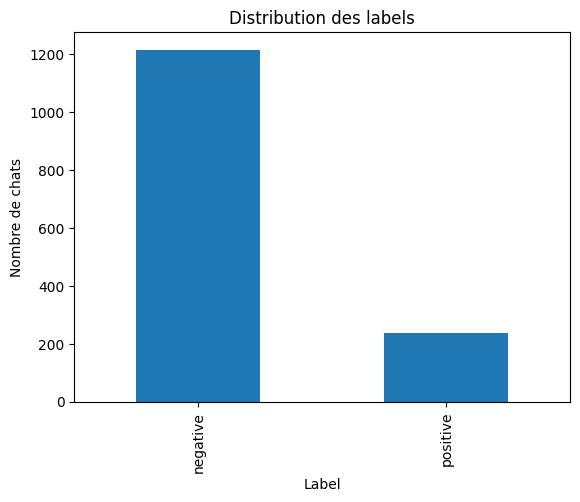

In [3]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
print(label_counts)

plt.figure()
label_counts.plot(kind='bar')
plt.title("Distribution des labels")
plt.xlabel("Label")
plt.ylabel("Nombre de chats")
plt.show()


Interprétation : Si tu vois une majorité de negative, ça veut dire qu’il y a un déséquilibre.

Conséquence : Les modèles de classification pourront être biaisés vers la classe majoritaire.

# b) Nombre de messages par conversation

In [4]:
df['nb_messages'].describe()


count    1454.000000
mean        9.631362
std         6.180493
min         0.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        55.000000
Name: nb_messages, dtype: float64